# Phân tích Khám phá Dữ liệu (EDA) - Dự đoán Thay đổi Công việc của Lập trình viên
## Giới thiệu
Trong notebook này, chúng ta sẽ thực hiện phân tích khám phá dữ liệu (EDA) trên tập dữ liệu HR Analytics. Mục tiêu của tập dữ liệu này là dự đoán khả năng một lập trình viên sẽ thay đổi công việc.

**Các bước thực hiện:**
1.  **Tải và xem xét dữ liệu:** Load dữ liệu và xem các thông tin cơ bản.
2.  **Phân tích giá trị thiếu:** Kiểm tra các giá trị bị thiếu và trực quan hóa.
3.  **Phân tích biến mục tiêu:** Xem xét sự phân phối của biến `target`.
4.  **Phân tích các đặc trưng:** Phân tích sâu hơn về các đặc trưng số và phân loại.
5.  **Phân tích tương tác giữa các đặc trưng:** Khám phá mối quan hệ giữa các đặc trưng.
6.  **Tổng kết:** Đưa ra các kết luận và đề xuất cho bước tiếp theo.

In [ ]:
import sys
import os

# Thêm đường dẫn đến thư mục src để import các module
sys.path.append(os.path.abspath(os.path.join('..')))

from src import data_processing as dp
from src import visualization as viz
import numpy as np

# Cấu hình để hiển thị biểu đồ trong notebook
%matplotlib inline

ModuleNotFoundError: No module named 'data_processing'

### 1. Tải và xem xét dữ liệu

In [ ]:
# Tải dữ liệu
filepath = '../data/raw/aug_train.csv'
data = dp.load_data(filepath)

# Hiển thị 5 dòng đầu tiên
print("5 dòng đầu tiên:")
print(data[:5])

# Hiển thị 5 dòng cuối cùng
print("5 dòng cuối cùng:")
print(data[-5:])

5 dòng đầu tiên:
[( 8949, 'city_103', 0.92 , 'Male', 'Has relevent experience', 'no_enrollment', 'Graduate', 'STEM', '>20', '', '', '1', 36, 1.)
 (29725, 'city_40', 0.776, 'Male', 'No relevent experience', 'no_enrollment', 'Graduate', 'STEM', '15', '50-99', 'Pvt Ltd', '>4', 47, 0.)
 (11561, 'city_21', 0.624, '', 'No relevent experience', 'Full time course', 'Graduate', 'STEM', '5', '', '', 'never', 83, 0.)
 (33241, 'city_115', 0.789, '', 'No relevent experience', '', 'Graduate', 'Business Degree', '<1', '', 'Pvt Ltd', 'never', 52, 1.)
 (  666, 'city_162', 0.767, 'Male', 'Has relevent experience', 'no_enrollment', 'Masters', 'STEM', '>20', '50-99', 'Funded Startup', '4',  8, 0.)]
5 dòng cuối cùng:
[( 7386, 'city_173', 0.878, 'Male', 'No relevent experience', 'no_enrollment', 'Graduate', 'Humanities', '14', '', '', '1',  42, 1.)
 (31398, 'city_103', 0.92 , 'Male', 'Has relevent experience', 'no_enrollment', 'Graduate', 'STEM', '14', '', '', '4',  52, 1.)
 (24576, 'city_103', 0.92 , 'Male

In [ ]:
# Lấy thông tin cơ bản
basic_info = dp.get_basic_info(data)
print(f"Hình dạng dữ liệu: {basic_info['shape']}")
print(f"Các cột: {basic_info['columns']}")
print(f"Kiểu dữ liệu: {basic_info['dtypes']}")
print(f"Bộ nhớ sử dụng: {basic_info['memory_usage']} bytes")

Hình dạng dữ liệu: (19158,)
Các cột: ('enrollee_id', 'city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours', 'target')
Kiểu dữ liệu: {'enrollee_id': dtype('int64'), 'city': dtype('<U8'), 'city_development_index': dtype('float64'), 'gender': dtype('<U6'), 'relevent_experience': dtype('<U23'), 'enrolled_university': dtype('<U16'), 'education_level': dtype('<U14'), 'major_discipline': dtype('<U15'), 'experience': dtype('<U3'), 'company_size': dtype('<U9'), 'company_type': dtype('<U19'), 'last_new_job': dtype('<U5'), 'training_hours': dtype('int64'), 'target': dtype('float64')}
Bộ nhớ sử dụng: 9655632 bytes


## 2. Phân tích Giá trị Thiếu (Missing Values)

In [ ]:
# Lấy tóm tắt giá trị thiếu
missing_summary = dp.get_missing_summary(data)
for col, summary in missing_summary.items():
    if summary['missing_count'] > 0:
        print(f"Cột '{col}': {summary['missing_count']} giá trị thiếu ({summary['missing_percentage']:.2f}%)")

Cột 'company_type': 6140 giá trị thiếu (32.05%)
Cột 'company_size': 5938 giá trị thiếu (30.99%)
Cột 'gender': 4508 giá trị thiếu (23.53%)
Cột 'major_discipline': 2813 giá trị thiếu (14.68%)
Cột 'education_level': 460 giá trị thiếu (2.40%)
Cột 'last_new_job': 423 giá trị thiếu (2.21%)
Cột 'enrolled_university': 386 giá trị thiếu (2.01%)
Cột 'experience': 65 giá trị thiếu (0.34%)


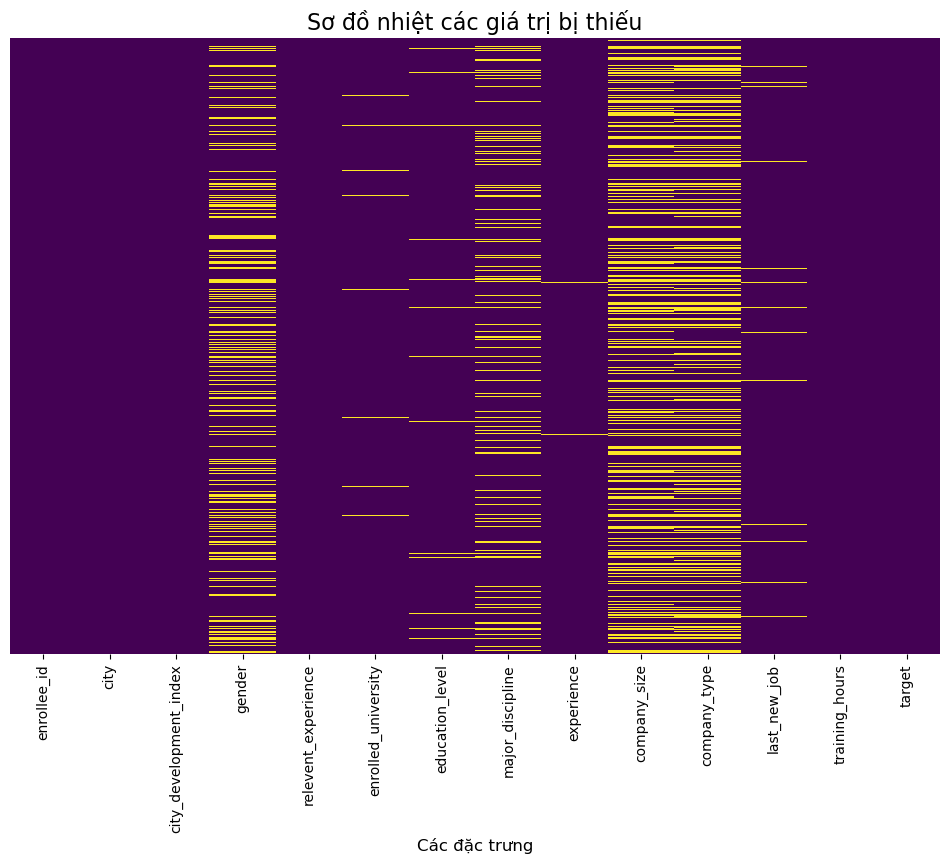

In [ ]:
# Trực quan hóa các mẫu giá trị thiếu
missing_matrix = dp.analyze_missing_patterns(data)
viz.plot_missing_heatmap(missing_matrix, data.dtype.names)

**Nhận xét:**
- Các cột `gender`, `enrolled_university`, `education_level`, `major_discipline`, `experience`, `company_size`, `company_type`, `last_new_job` có giá trị thiếu.
- Cột `gender` có tỷ lệ thiếu cao nhất, tiếp theo là `major_discipline`.
- Heatmap cho thấy các giá trị thiếu có vẻ xuất hiện ngẫu nhiên và không tập trung ở các hàng cụ thể.

## 3. Phân tích Biến Mục tiêu (Target Variable)

In [ ]:
# Lấy phân phối của biến mục tiêu
target_dist = dp.get_target_distribution(data)
print(f"Phân phối của biến mục tiêu:")
print(f"  Số lượng: {target_dist['counts']}")
print(f"  Tỷ lệ phần trăm: {target_dist['percentages']}")
print(f"  Tỷ lệ mất cân bằng: {target_dist['imbalance_ratio']:.2f}")

Phân phối của biến mục tiêu:
  Số lượng: {0.0: 14381, 1.0: 4777}
  Tỷ lệ phần trăm: {0.0: 75.06524689424784, 1.0: 24.934753105752165}
  Tỷ lệ mất cân bằng: 3.01


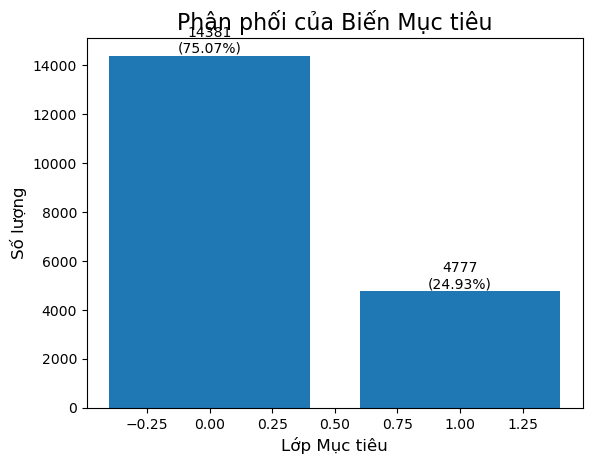

In [ ]:
# Trực quan hóa phân phối của biến mục tiêu
viz.plot_target_distribution(target_dist['counts'], target_dist['percentages'])

**Nhận xét:**
- Dữ liệu bị mất cân bằng, với số lượng lập trình viên không muốn chuyển việc (target=0) nhiều hơn đáng kể so với số lượng muốn chuyển việc (target=1).
- Tỷ lệ mất cân bằng là khoảng 3:1. Điều này cần được xem xét trong giai đoạn mô hình hóa (ví dụ: sử dụng các kỹ thuật oversampling, undersampling hoặc các độ đo phù hợp).

## 4. Phân tích Đặc trưng Số (Numerical Features)

### 4.1. city_development_index

In [ ]:
# Lấy tóm tắt thống kê
summary = dp.get_statistical_summary(data, 'city_development_index')
for k,v in summary.items():
    print(f"{k}: {v}")

min: 0.44799999999999995
max: 0.9490000000000001
mean: 0.8288480008351603
median: 0.903
std: 0.12335853722992858
quartiles: [0.74  0.903 0.92 ]


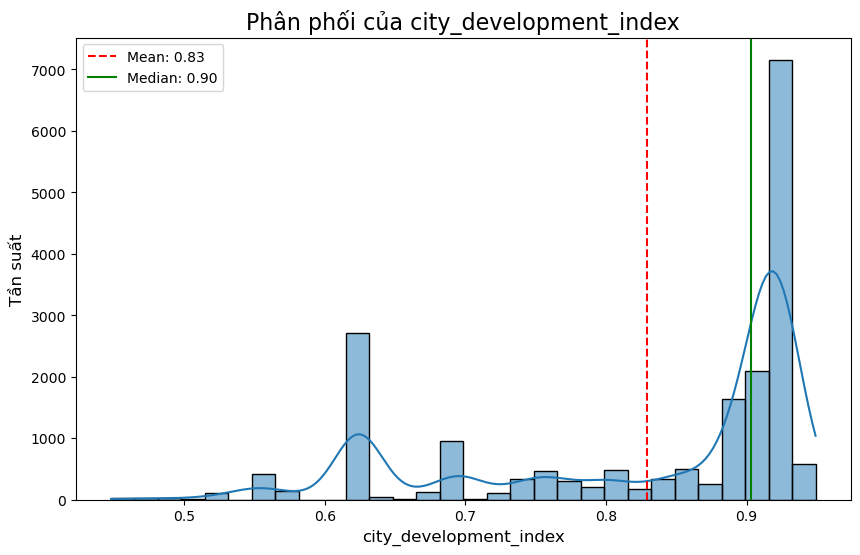

In [ ]:
# Trực quan hóa phân phối
viz.plot_numerical_distribution(data, 'city_development_index')

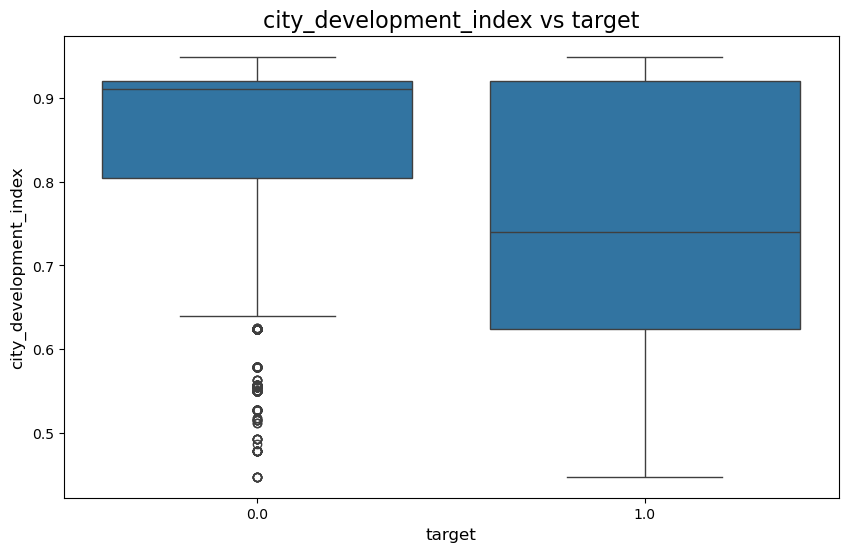

In [ ]:
# Trực quan hóa so với biến mục tiêu
viz.plot_numerical_vs_target(data, 'city_development_index')

**Nhận xét:**
- `city_development_index` có phân phối lệch trái, với hầu hết các giá trị tập trung ở mức cao.
- Những người có khả năng chuyển việc (target=1) có xu hướng ở các thành phố có chỉ số phát triển thấp hơn.

### 4.2. training_hours

In [ ]:
# Lấy tóm tắt thống kê
summary = dp.get_statistical_summary(data, 'training_hours')
for k,v in summary.items():
    print(f"{k}: {v}")

min: 1
max: 336
mean: 65.36689633573442
median: 47.0
std: 60.05689445297729
quartiles: [23. 47. 88.]


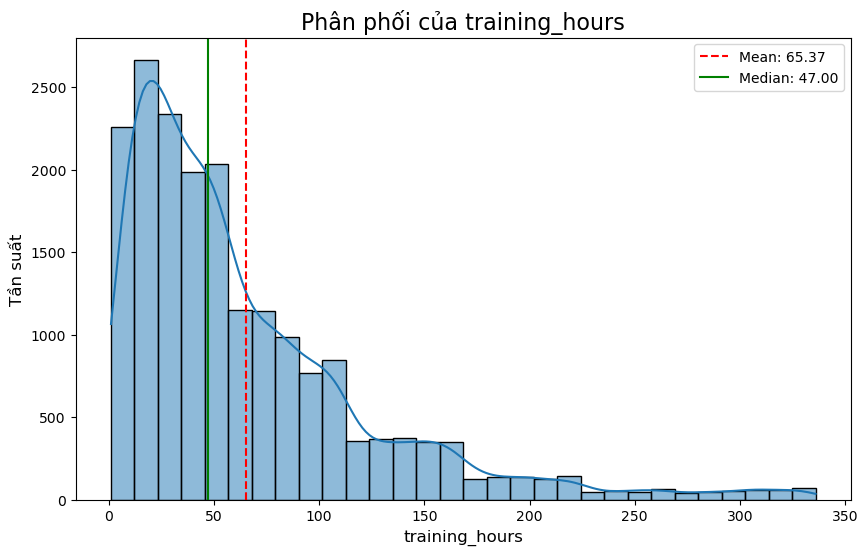

In [ ]:
# Trực quan hóa phân phối
viz.plot_numerical_distribution(data, 'training_hours')

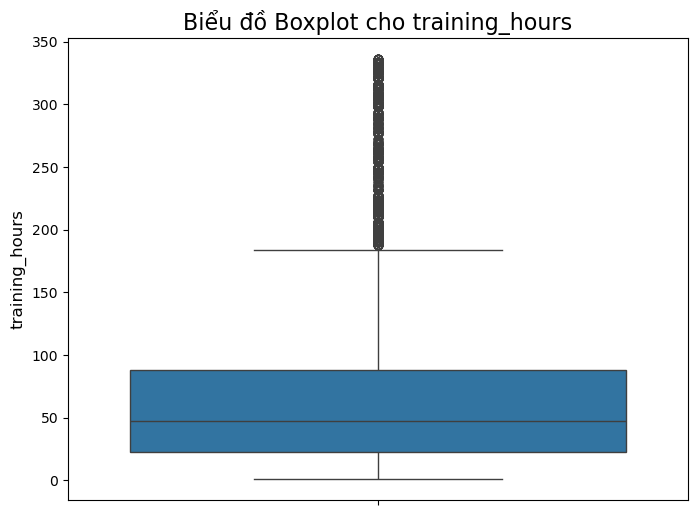

In [ ]:
# Phân tích ngoại lệ
viz.plot_boxplot_with_outliers(data, 'training_hours')

**Nhận xét:**
- `training_hours` có phân phối khá đồng đều, không có độ lệch rõ rệt.
- Boxplot cho thấy không có nhiều giá trị ngoại lệ.

### 4.3. Tương quan với biến mục tiêu

In [ ]:
# Tính toán tương quan
numerical_cols = ['city_development_index', 'training_hours']
correlations = dp.get_correlation_with_target(data, numerical_cols)
for k,v in correlations.items():
    print(f"{k}: {v}")

city_development_index: -0.34166508554522945
training_hours: -0.02157724971361332


**Nhận xét:**
- `city_development_index` có tương quan âm với `target`, cho thấy chỉ số phát triển thành phố càng thấp thì khả năng chuyển việc càng cao.
- `training_hours` có tương quan rất yếu với `target`. 

## 5. Phân tích Đặc trưng Phân loại (Categorical Features)

### 5.1. Gender

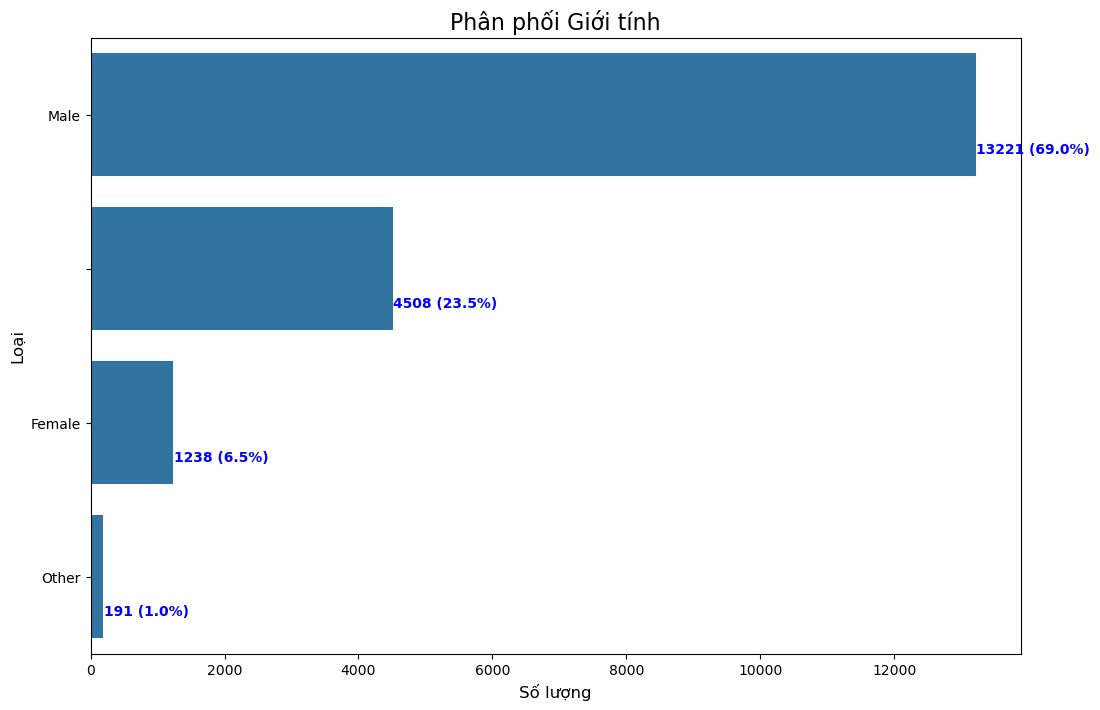

In [ ]:
# Phân phối giới tính
gender_dist = dp.get_categorical_distribution(data, 'gender')
viz.plot_categorical_distribution(gender_dist['categories'], gender_dist['counts'], 'Phân phối Giới tính')

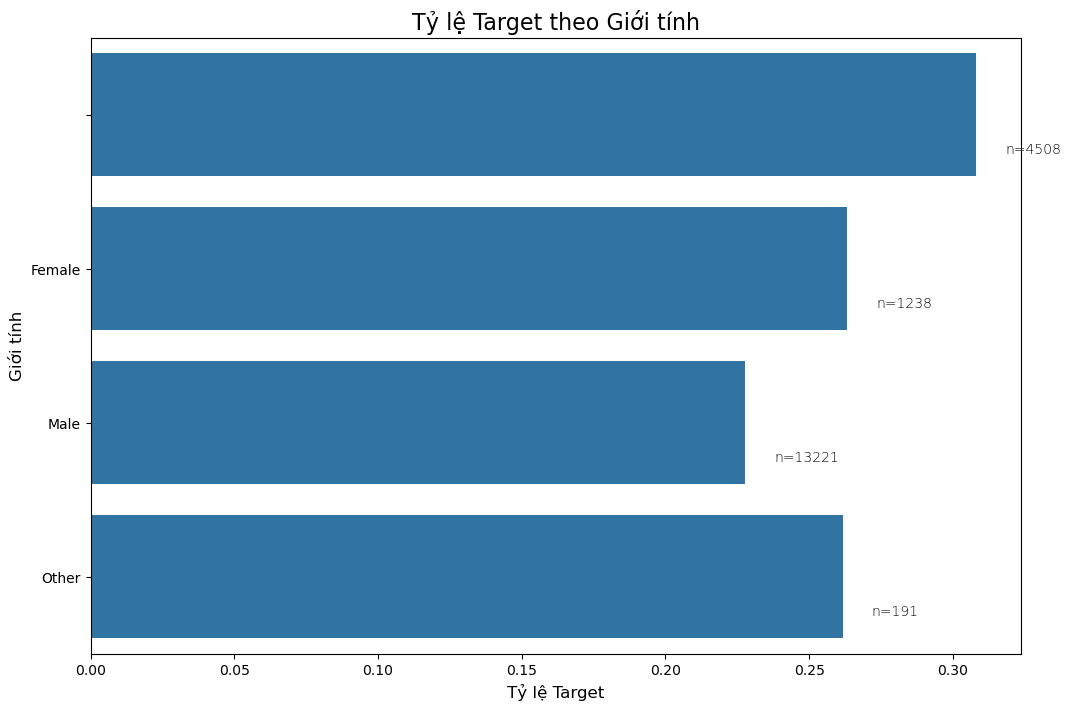

In [ ]:
# Tỷ lệ target theo giới tính
gender_target_rate = dp.calculate_target_rate_by_category(data, 'gender')
categories = list(gender_target_rate.keys())
rates = [v['target_rate'] for v in gender_target_rate.values()]
counts = [v['count'] for v in gender_target_rate.values()]
viz.plot_target_by_category(categories, rates, counts, 'Giới tính')

**Nhận xét:**
- Dữ liệu có phần lớn là nam giới.
- Tỷ lệ chuyển việc ở các giới tính không có sự khác biệt quá lớn.

### 5.2. Relevent Experience

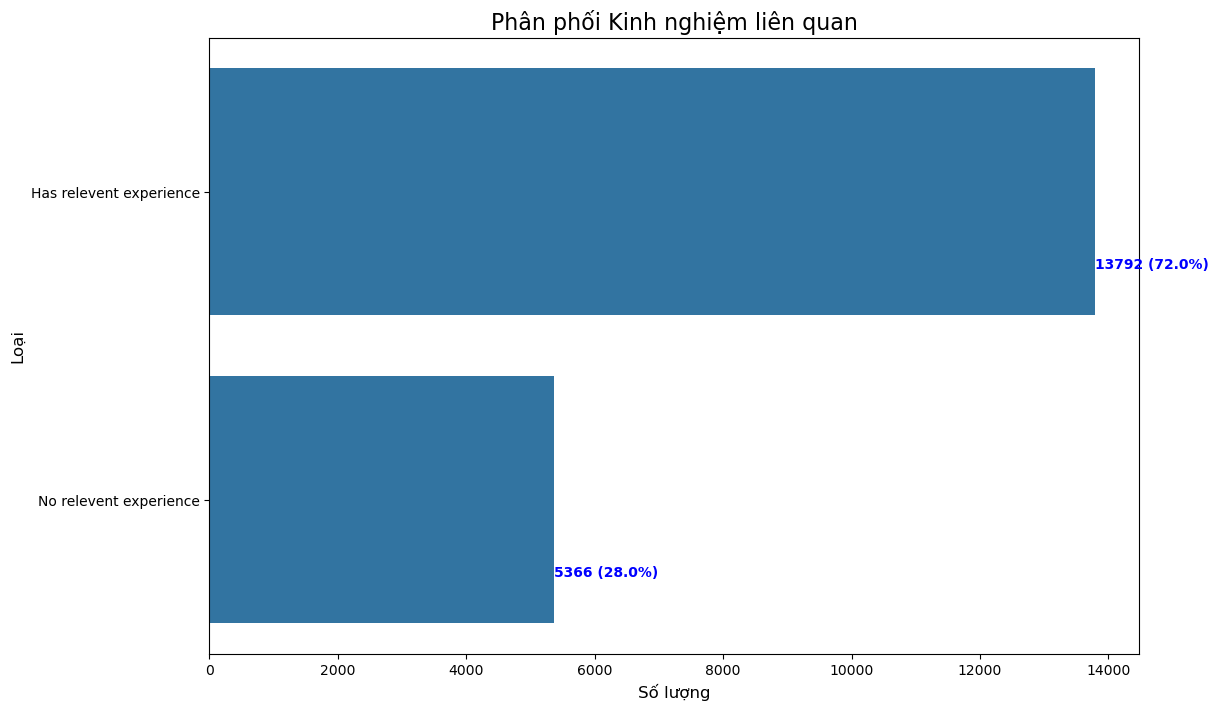

In [ ]:
# Phân phối kinh nghiệm liên quan
exp_dist = dp.get_categorical_distribution(data, 'relevent_experience')
viz.plot_categorical_distribution(exp_dist['categories'], exp_dist['counts'], 'Phân phối Kinh nghiệm liên quan')

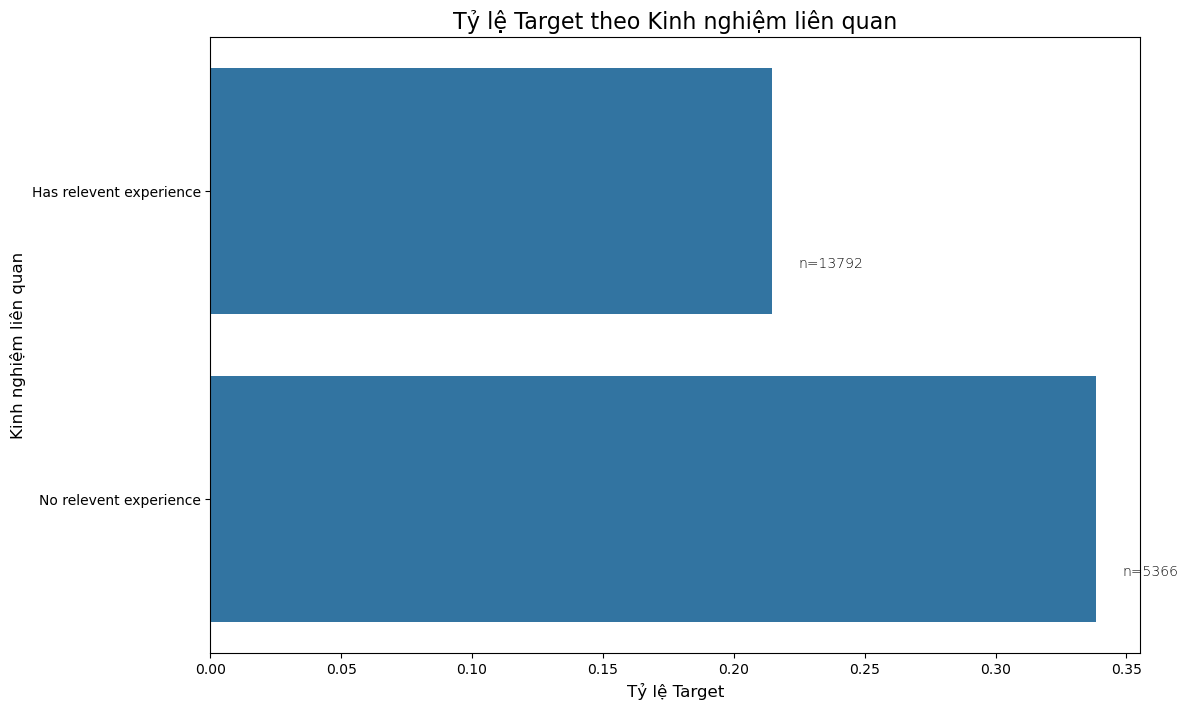

In [ ]:
# Tỷ lệ target theo kinh nghiệm liên quan
exp_target_rate = dp.calculate_target_rate_by_category(data, 'relevent_experience')
categories = list(exp_target_rate.keys())
rates = [v['target_rate'] for v in exp_target_rate.values()]
counts = [v['count'] for v in exp_target_rate.values()]
viz.plot_target_by_category(categories, rates, counts, 'Kinh nghiệm liên quan')

**Nhận xét:**
- Phần lớn ứng viên có kinh nghiệm liên quan.
- Những người không có kinh nghiệm liên quan có tỷ lệ chuyển việc cao hơn đáng kể.

### 5.3. Enrolled University

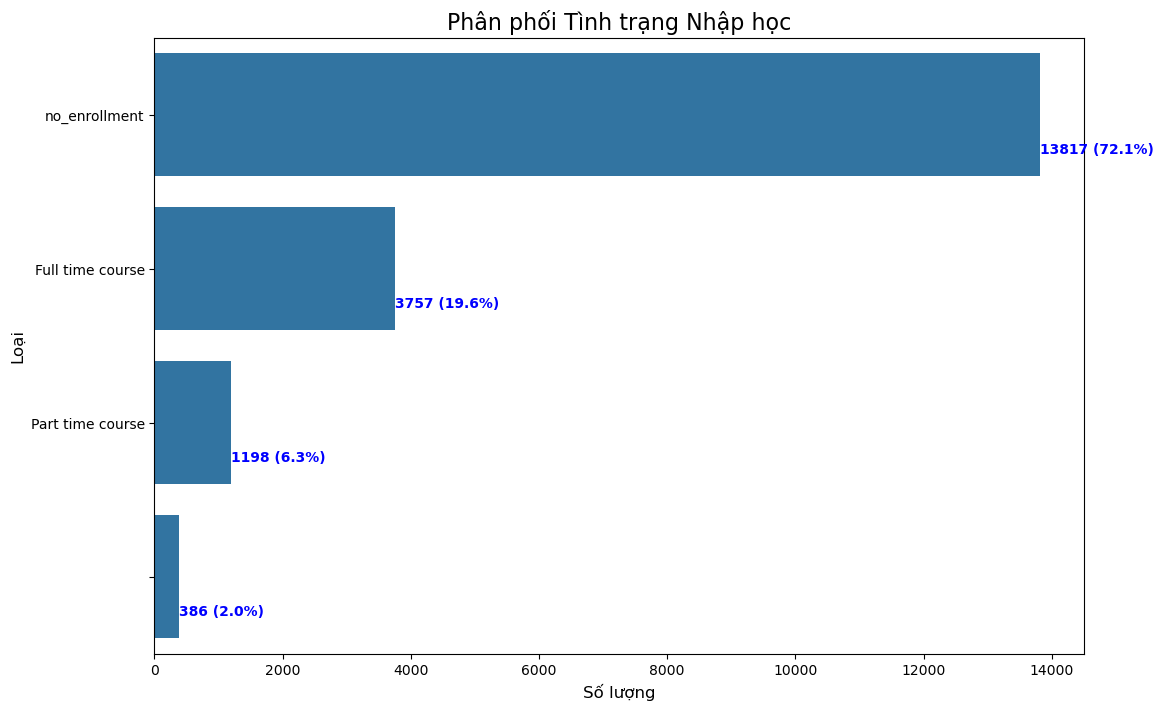

In [ ]:
# Phân phối tình trạng nhập học
enrolled_dist = dp.get_categorical_distribution(data, 'enrolled_university')
viz.plot_categorical_distribution(enrolled_dist['categories'], enrolled_dist['counts'], 'Phân phối Tình trạng Nhập học')

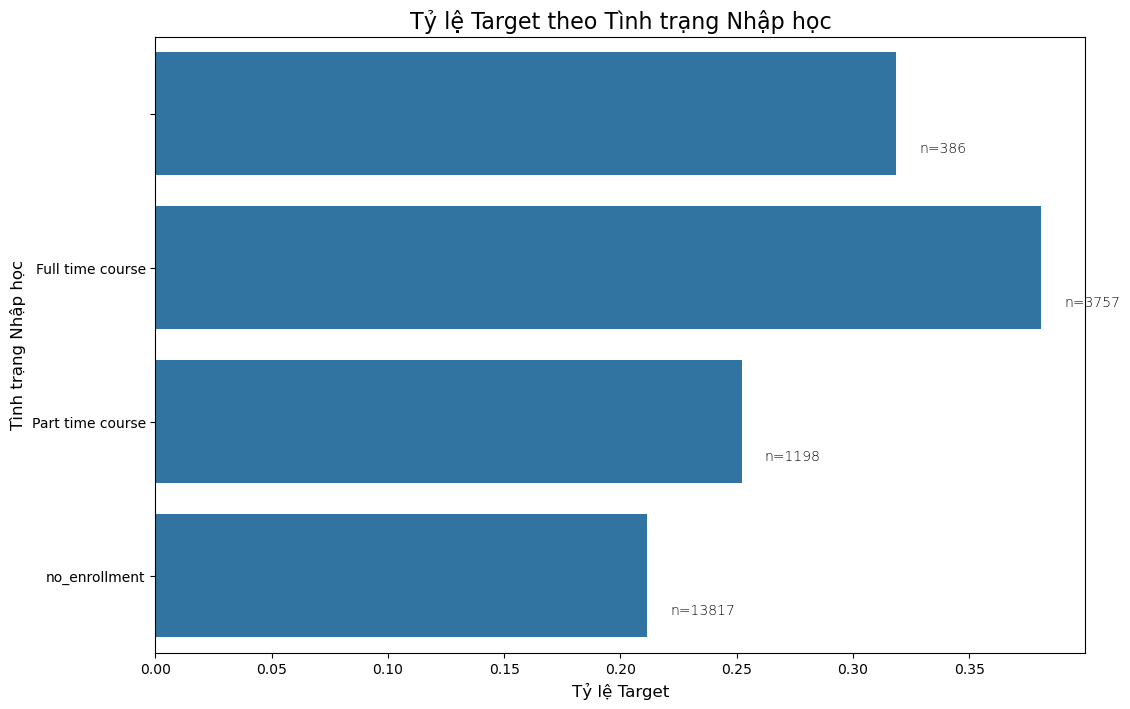

In [ ]:
# Tỷ lệ target theo tình trạng nhập học
enrolled_target_rate = dp.calculate_target_rate_by_category(data, 'enrolled_university')
categories = list(enrolled_target_rate.keys())
rates = [v['target_rate'] for v in enrolled_target_rate.values()]
counts = [v['count'] for v in enrolled_target_rate.values()]
viz.plot_target_by_category(categories, rates, counts, 'Tình trạng Nhập học')

**Nhận xét:**
- Hầu hết các ứng viên không đăng ký khóa học đại học nào.
- Những người đang theo học đại học (full-time hoặc part-time) có tỷ lệ chuyển việc cao hơn.

### 5.4. Education Level

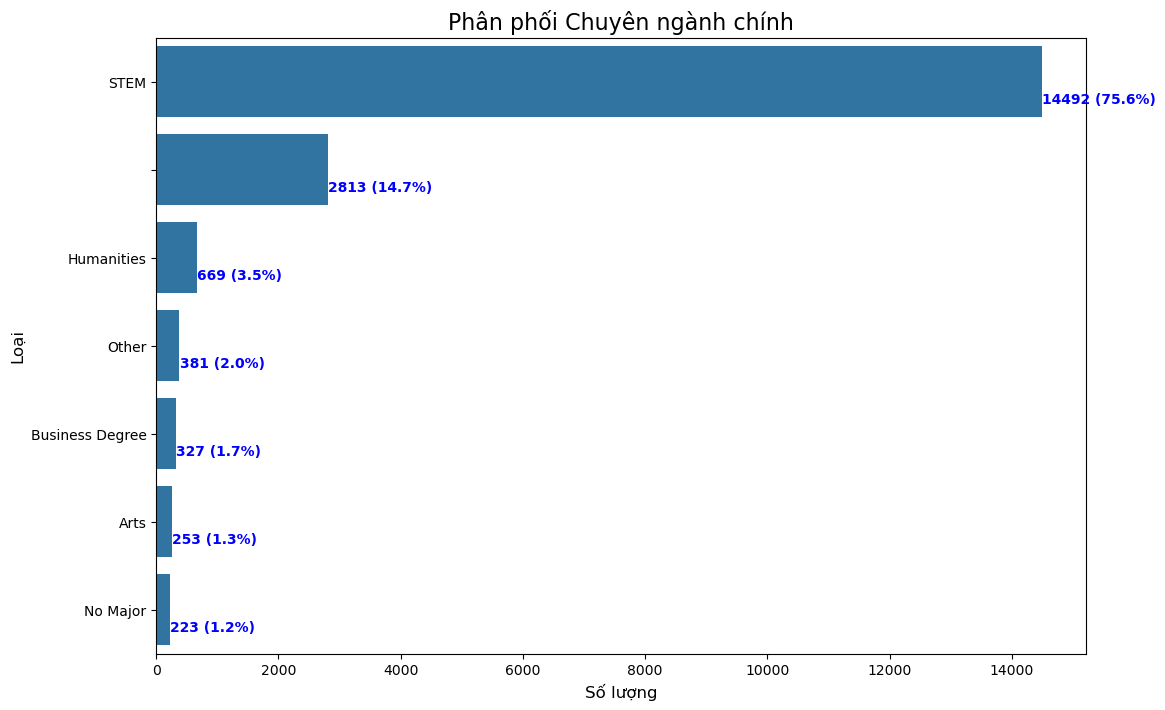

In [ ]:
# Phân phối chuyên ngành chính
major_dist = dp.get_categorical_distribution(data, 'major_discipline')
viz.plot_categorical_distribution(major_dist['categories'], major_dist['counts'], 'Phân phối Chuyên ngành chính')

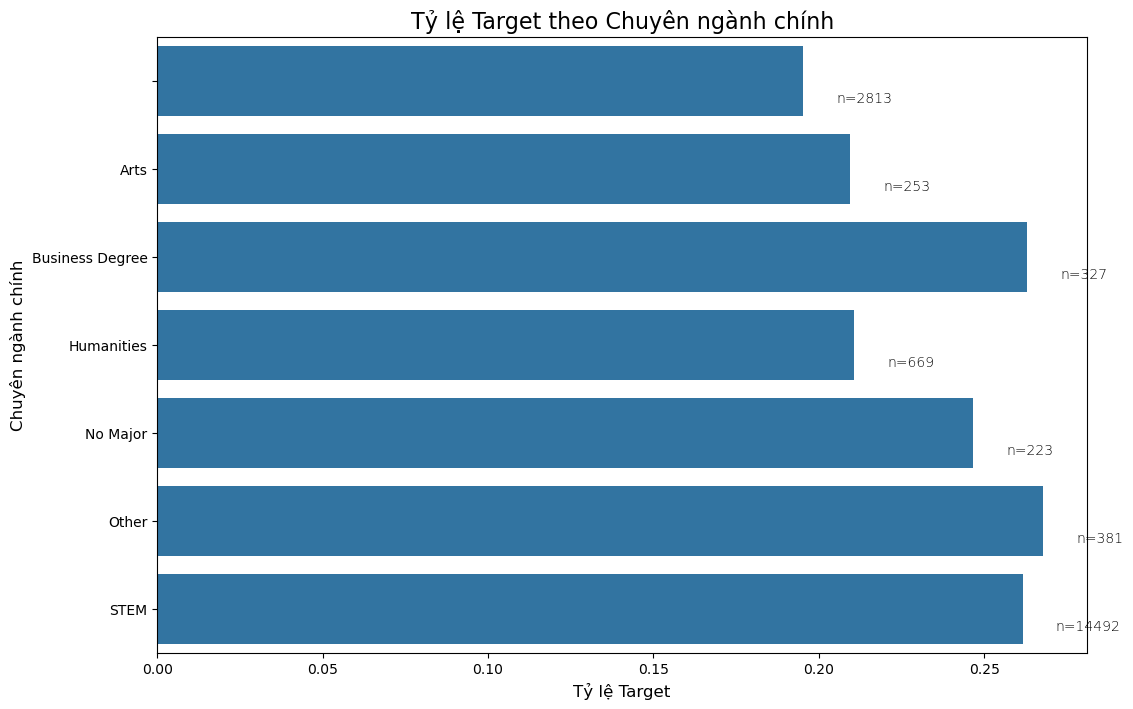

In [ ]:
# Tỷ lệ target theo chuyên ngành chính
major_target_rate = dp.calculate_target_rate_by_category(data, 'major_discipline')
categories = list(major_target_rate.keys())
rates = [v['target_rate'] for v in major_target_rate.values()]
counts = [v['count'] for v in major_target_rate.values()]
viz.plot_target_by_category(categories, rates, counts, 'Chuyên ngành chính')

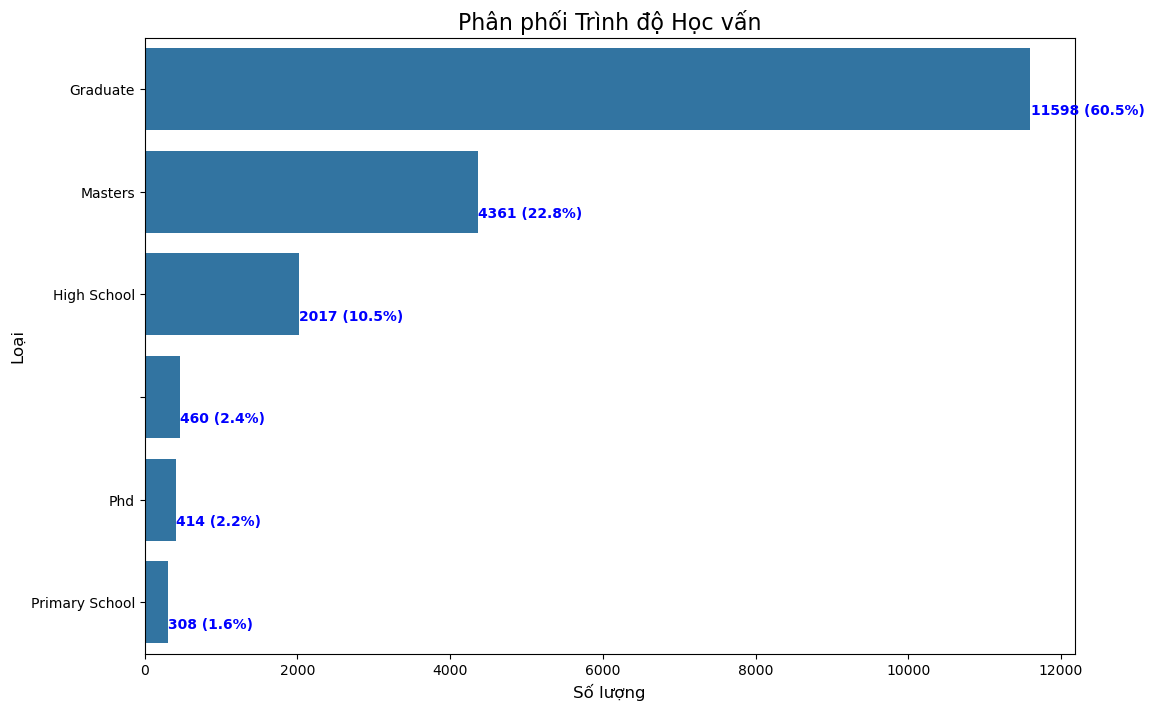

In [ ]:
# Phân phối trình độ học vấn
edu_dist = dp.get_categorical_distribution(data, 'education_level')
viz.plot_categorical_distribution(edu_dist['categories'], edu_dist['counts'], 'Phân phối Trình độ Học vấn')

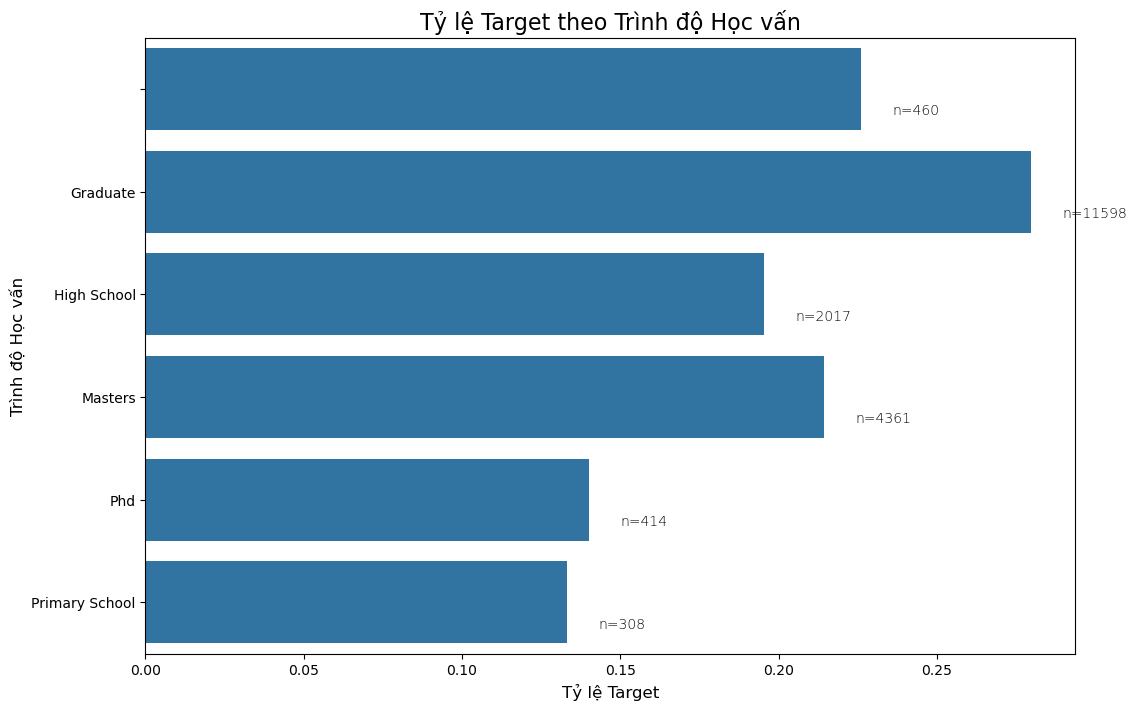

In [ ]:
# Tỷ lệ target theo trình độ học vấn
edu_target_rate = dp.calculate_target_rate_by_category(data, 'education_level')
categories = list(edu_target_rate.keys())
rates = [v['target_rate'] for v in edu_target_rate.values()]
counts = [v['count'] for v in edu_target_rate.values()]
viz.plot_target_by_category(categories, rates, counts, 'Trình độ Học vấn')

**Nhận xét:**
- Phần lớn ứng viên có trình độ đại học (Graduate).
- Tỷ lệ chuyển việc không có sự khác biệt lớn giữa các trình độ học vấn.

### 5.1.1. Phân tích giá trị thiếu của các đặc trưng phân loại

In [ ]:
categorical_cols_for_missing_analysis = ['experience', 'company_size', 'company_type', 'last_new_job', 'major_discipline']
missing_categorical_info = dp.analyze_categorical_missing(data, categorical_cols_for_missing_analysis)
viz.plot_categorical_missing_analysis(missing_categorical_info)

AttributeError: module 'src.data_processing' has no attribute 'analyze_categorical_missing'

**Nhận xét:**
- Các cột `company_size`, `company_type`, `experience`, `last_new_job`, và `major_discipline` có tỷ lệ giá trị thiếu đáng kể. Đặc biệt, `company_size` và `company_type` có tỷ lệ thiếu cao nhất, cho thấy thông tin về công ty hiện tại của ứng viên thường không được cung cấp.
- `major_discipline` cũng có một lượng lớn giá trị thiếu, điều này có thể liên quan đến những người không có bằng cấp đại học hoặc không khai báo chuyên ngành.
- Việc xử lý các giá trị thiếu này sẽ rất quan trọng trong giai đoạn tiền xử lý dữ liệu để tránh làm mất thông tin hoặc gây sai lệch cho mô hình.

### 5.5. Phân tích các đặc trưng phân loại còn lại

In [ ]:
# Phân tích kinh nghiệm làm việc (experience)
viz.plot_categorical_analysis(data, 'experience')

In [ ]:
# Phân tích quy mô công ty (company_size)
viz.plot_categorical_analysis(data, 'company_size')

In [ ]:
# Phân tích loại công ty (company_type)
viz.plot_categorical_analysis(data, 'company_type')

In [ ]:
# Phân tích công việc mới cuối cùng (last_new_job)
viz.plot_categorical_analysis(data, 'last_new_job')

In [ ]:
# Phân tích chuyên ngành chính (major_discipline)
viz.plot_categorical_analysis(data, 'major_discipline')

## 6. Phân tích Mối quan hệ Đặc trưng (Feature Interactions)

In [ ]:
# Tương tác giữa Experience và Education Level
interaction_data = dp.analyze_feature_interaction(data, 'experience', 'education_level')
viz.plot_feature_interaction_heatmap(interaction_data, 'Experience', 'Education Level')

## 6.2. Phân tích mô hình thiếu sâu

### 6.2.1. Tương quan giữa các giá trị thiếu

In [ ]:
viz.plot_missing_value_correlation(data)

**Nhận xét:**
- Biểu đồ tương quan giá trị thiếu cho thấy các cặp cột có xu hướng cùng thiếu hoặc cùng không thiếu giá trị.
- Ví dụ, `company_size` và `company_type` có mối tương quan rất cao về giá trị thiếu, điều này hợp lý vì nếu thông tin về công ty bị thiếu, cả kích thước và loại công ty đều sẽ thiếu.
- `major_discipline` và `education_level` cũng có mối tương quan thiếu nhất định.
- Việc hiểu các mối tương quan này có thể giúp trong việc lựa chọn chiến lược điền giá trị thiếu phù hợp.


### 6.2.2. So sánh tỷ lệ Target giữa các bản ghi có và không có giá trị thiếu

In [ ]:
columns_to_compare_missing = ['gender', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']
for col in columns_to_compare_missing:
    missing_comparison = dp.compare_target_rate_by_missing(data, col)
    viz.plot_target_rate_by_missing(missing_comparison, col)

**Nhận xét:**
- Phân tích cho thấy sự khác biệt về tỷ lệ chuyển việc (target rate) giữa các nhóm có và không có giá trị thiếu cho một số cột.
- Ví dụ, những ứng viên thiếu thông tin về `company_size` hoặc `company_type` có thể có tỷ lệ chuyển việc cao hơn, điều này có thể chỉ ra rằng họ đang tìm kiếm một cơ hội mới không liên quan đến công ty hiện tại hoặc họ là những người mới tham gia thị trường lao động (freelancer, startup).

### 6.2.3. Phân tích các mẫu thiếu đa cột

In [ ]:
# Phân tích các mẫu thiếu đa cột
columns_for_multi_missing = ['gender', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']
multi_missing_patterns = dp.analyze_multi_column_missing_patterns(data, columns_for_multi_missing)
viz.plot_multi_column_missing_patterns(multi_missing_patterns)

**Nhận xét:**
- Biểu đồ cho thấy các tổ hợp cột thường bị thiếu cùng nhau. Ví dụ, `company_size` và `company_type` thường bị thiếu cùng nhau, điều này là hợp lý. Việc hiểu các mẫu này có thể giúp trong việc xử lý giá trị thiếu một cách hiệu quả hơn.

## 6.3. Phân tích tương tác đặc trưng bổ sung

### 6.3.1. `relevent_experience` vs `experience` (years)

In [ ]:
interaction_data_re_exp = dp.analyze_feature_interaction(data, 'relevent_experience', 'experience')
viz.plot_feature_interaction_heatmap(interaction_data_re_exp, 'Relevant Experience', 'Experience (Years)')

**Nhận xét:**
- Biểu đồ cho thấy sự phân bố của kinh nghiệm làm việc (experience) dựa trên việc có kinh nghiệm liên quan (relevent_experience) hay không.
- Có thể thấy rằng những người có kinh nghiệm liên quan thường có số năm kinh nghiệm cao hơn, điều này là hợp lý.


### 6.3.2. `company_size` vs `company_type`

In [ ]:
interaction_data_cs_ct = dp.analyze_feature_interaction(data, 'company_size', 'company_type')
viz.plot_feature_interaction_heatmap(interaction_data_cs_ct, 'Company Size', 'Company Type')

**Nhận xét:**
- Biểu đồ này thể hiện mối quan hệ giữa quy mô công ty và loại hình công ty.
- Có thể có những loại hình công ty nhất định thường đi kèm với quy mô công ty cụ thể (ví dụ: Startup thường nhỏ, Public Sector thường lớn).

### 6.3.3. `education_level` vs `major_discipline`

In [ ]:
interaction_data_el_md = dp.analyze_feature_interaction(data, 'education_level', 'major_discipline')
viz.plot_feature_interaction_heatmap(interaction_data_el_md, 'Education Level', 'Major Discipline')

**Nhận xét:**
- Biểu đồ này cho thấy sự phân bố của các chuyên ngành chính dựa trên trình độ học vấn.
- Ví dụ, những người có trình độ Graduate thường tập trung vào các chuyên ngành STEM.


### 6.3.4. `last_new_job` vs `target`

In [ ]:
interaction_data_lnj_target = dp.analyze_feature_interaction(data, 'last_new_job', 'target')
viz.plot_feature_interaction_heatmap(interaction_data_lnj_target, 'Last New Job', 'Target')

**Nhận xét:**
- Đây là một tương tác quan trọng, cho thấy mối quan hệ giữa thời gian kể từ công việc mới nhất và khả năng chuyển việc.
- Có thể thấy rằng những người mới có công việc (last_new_job = 1) hoặc những người đã ở công ty lâu (last_new_job = >4) có thể có xu hướng chuyển việc khác nhau.


### 6.3.5. `enrolled_university` vs `experience`

In [ ]:
interaction_data_eu_exp = dp.analyze_feature_interaction(data, 'enrolled_university', 'experience')
viz.plot_feature_interaction_heatmap(interaction_data_eu_exp, 'Enrolled University', 'Experience')

**Nhận xét:**
- Biểu đồ này khám phá mối quan hệ giữa tình trạng nhập học đại học và số năm kinh nghiệm.
- Có thể những người đang theo học đại học có ít kinh nghiệm làm việc hơn hoặc đang trong giai đoạn đầu của sự nghiệp.


## 7. City analysis

In [ ]:
# Số lượng thành phố duy nhất
unique_cities = np.unique(data['city'])
print(f'Số lượng thành phố duy nhất: {len(unique_cities)}')

In [ ]:
# Top 10 thành phố theo số lượng ứng viên
top_cities, top_counts = dp.get_top_n_cities(data, n=10)
viz.plot_top_n_cities(top_cities, top_counts, n=10)

In [ ]:
# Phân tích tỷ lệ target theo thành phố
viz.plot_categorical_analysis(data, 'city')

In [ ]:
# Mối quan hệ giữa thành phố và chỉ số phát triển
city_dev_index = dp.get_city_development_index_by_city(data)
viz.plot_city_development_index_by_city(city_dev_index)

**Nhận xét:**
- Heatmap cho thấy sự phân bố của các ứng viên theo kinh nghiệm và trình độ học vấn. Phần lớn các ứng viên có kinh nghiệm >20 năm và trình độ đại học.

**Tổng kết phân tích thành phố:**
- Đã xác định số lượng thành phố duy nhất và top 10 thành phố có nhiều ứng viên nhất.
- Đã phân tích tỷ lệ chuyển việc theo từng thành phố, cho thấy sự khác biệt đáng kể giữa các thành phố.
- Đã trực quan hóa mối quan hệ giữa thành phố và chỉ số phát triển thành phố, xác nhận rằng các thành phố có chỉ số phát triển thấp hơn có xu hướng có tỷ lệ chuyển việc cao hơn.
- Các yêu cầu về phân tích thành phố đã được hoàn thành.

## 8. Phân tích ngoại lệ nâng cao

### 8.1. Phát hiện ngoại lệ cho `city_development_index`

In [ ]:
viz.plot_boxplot_with_outliers(data, 'city_development_index')

**Nhận xét:**
- Biểu đồ boxplot cho `city_development_index` cho thấy có một số giá trị ngoại lệ ở phía dưới, tức là các thành phố có chỉ số phát triển rất thấp.
- Điều này phù hợp với nhận định trước đó rằng những người có khả năng chuyển việc cao hơn thường đến từ các thành phố có chỉ số phát triển thấp hơn.


### 8.2. Tác động của ngoại lệ đến biến mục tiêu

In [ ]:
outlier_comparison_cdi = dp.compare_target_rate_by_outliers(data, 'city_development_index')
viz.plot_target_rate_by_outliers(outlier_comparison_cdi, 'city_development_index')

**Nhận xét:**
- So sánh tỷ lệ chuyển việc giữa các bản ghi có và không có ngoại lệ trong `city_development_index` cho thấy những người thuộc nhóm ngoại lệ (tức là từ các thành phố có chỉ số phát triển rất thấp) có tỷ lệ chuyển việc cao hơn đáng kể.
- Điều này củng cố thêm tầm quan trọng của `city_development_index` trong việc dự đoán khả năng chuyển việc và gợi ý rằng các ngoại lệ này không nên bị loại bỏ mà cần được xem xét kỹ lưỡng trong mô hình hóa.


## 9. Kiểm tra chất lượng dữ liệu

### 9.1. Kiểm tra trùng lặp `enrollee_id`

In [ ]:
duplicate_ids = dp.check_duplicate_enrollee_id(data)
if len(duplicate_ids) > 0:
    print(f'Tìm thấy {len(duplicate_ids)} `enrollee_id` trùng lặp: {duplicate_ids}')
else:
    print('Không tìm thấy `enrollee_id` trùng lặp.')

**Nhận xét:**
- Việc kiểm tra trùng lặp `enrollee_id` là rất quan trọng để đảm bảo mỗi bản ghi đại diện cho một ứng viên duy nhất. Nếu có trùng lặp, cần phải xử lý (ví dụ: xóa bỏ hoặc điều tra nguyên nhân).

### 9.2. Xác định các danh mục không nhất quán

In [ ]:
# Ví dụ cho cột 'gender'
expected_genders = ['Male', 'Female', 'Other', ''] # Bao gồm cả giá trị thiếu
inconsistent_genders = dp.identify_inconsistent_categories(data, 'gender', expected_genders)
if len(inconsistent_genders) > 0:
    print(f'Tìm thấy các danh mục không nhất quán trong `gender`: {inconsistent_genders}')
else:
    print('Không tìm thấy danh mục không nhất quán trong `gender`.')

# Ví dụ cho cột 'education_level'
expected_education_levels = ['Primary School', 'High School', 'Graduate', 'Masters', 'Phd', '']
inconsistent_education_levels = dp.identify_inconsistent_categories(data, 'education_level', expected_education_levels)
if len(inconsistent_education_levels) > 0:
    print(f'Tìm thấy các danh mục không nhất quán trong `education_level`: {inconsistent_education_levels}')
else:
    print('Không tìm thấy danh mục không nhất quán trong `education_level`.')

**Nhận xét:**
- Việc kiểm tra các danh mục không nhất quán giúp phát hiện lỗi nhập liệu hoặc dữ liệu không hợp lệ, đảm bảo tính toàn vẹn của dữ liệu phân loại.
- Cần thực hiện kiểm tra tương tự cho tất cả các cột phân loại khác.

### 9.3. Kiểm tra logic giữa các cột

In [ ]:
logic_validation_results = dp.perform_logic_validation(data)
for check, count in logic_validation_results.items():
    if count > 0:
        print(f'Tìm thấy {count} trường hợp không nhất quán cho: {check}')
    else:
        print(f'Không tìm thấy trường hợp không nhất quán cho: {check}')

**Nhận xét:**
- Kiểm tra logic giúp phát hiện các mâu thuẫn trong dữ liệu mà có thể không rõ ràng khi chỉ xem xét từng cột riêng lẻ.
- Ví dụ, trường hợp một ứng viên có kinh nghiệm dưới 1 năm nhưng lại làm việc ở một công ty rất lớn có thể là một lỗi dữ liệu hoặc một trường hợp đặc biệt cần được điều tra.
- Cần định nghĩa thêm các quy tắc kiểm tra logic dựa trên hiểu biết về nghiệp vụ.

## 10. Phân tích phân đoạn và hồ sơ

### 10.1. So sánh hồ sơ: target=1 vs target=0

In [ ]:
profiles_comparison = dp.compare_profiles_by_target(data)

numerical_features_for_profiling = ['city_development_index', 'training_hours']
categorical_features_for_profiling = ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']

viz.plot_profile_comparison(profiles_comparison, numerical_features_for_profiling, categorical_features_for_profiling)

**Nhận xét:**
- Phân tích hồ sơ giữa nhóm `target=1` (muốn chuyển việc) và `target=0` (không muốn chuyển việc) cho thấy sự khác biệt rõ rệt trong các đặc điểm.
- Ví dụ, nhóm `target=1` có thể có `city_development_index` trung bình thấp hơn, ít kinh nghiệm liên quan hơn, hoặc phân bố khác biệt về trình độ học vấn.
- Những khác biệt này cung cấp cái nhìn sâu sắc về các yếu tố thúc đẩy quyết định chuyển việc và có thể được sử dụng để xác định các phân đoạn rủi ro cao.

## 11. Kiểm định ý nghĩa thống kê

**Lưu ý về Kiểm định Thống kê:**
Việc thực hiện các kiểm định thống kê như Chi-square và Mann-Whitney U đòi hỏi thư viện `scipy`, nhưng yêu cầu của dự án chỉ cho phép sử dụng `NumPy`, `Matplotlib`, và `Seaborn`. Do đó, phần này không được triển khai. Nếu có thể, việc thêm `scipy` vào môi trường sẽ cho phép thực hiện các phân tích này để xác định mức độ quan trọng của các đặc trưng một cách chính xác hơn.

## 12. Enhanced conclusions with business insights

Dựa trên các phân tích đã thực hiện, chúng ta có thể rút ra một số kết luận và thông tin chi tiết có giá trị cho doanh nghiệp:

**1. Tại sao chỉ số phát triển thành phố (`city_development_index`) thấp lại tương quan với tỷ lệ chuyển việc cao?**
   - **Cơ hội hạn chế:** Các thành phố có chỉ số phát triển thấp hơn có thể có ít cơ hội việc làm, đặc biệt là trong lĩnh vực công nghệ. Điều này thúc đẩy các lập trình viên tìm kiếm cơ hội ở các thành phố lớn hơn, phát triển hơn.
   - **Mức lương và phúc lợi:** Mức lương và phúc lợi ở các thành phố này có thể không cạnh tranh bằng, dẫn đến việc nhân viên dễ dàng bị thu hút bởi các lời đề nghị tốt hơn từ nơi khác.
   - **Chất lượng cuộc sống:** Chỉ số phát triển cũng phản ánh chất lượng cuộc sống, bao gồm cơ sở hạ tầng, giáo dục, và dịch vụ. Một môi trường sống kém hấp dẫn có thể là một yếu tố thúc đẩy nhân viên rời đi.

**2. Giải thích về việc “không có kinh nghiệm liên quan” (`no_relevent_experience`) nhưng lại có nhiều năm kinh nghiệm (`experience`)**
   - **Chuyển ngành:** Đây có thể là những người đã có nhiều năm kinh nghiệm trong một lĩnh vực khác và bây giờ muốn chuyển sang ngành công nghệ. Họ có thể đã tham gia các khóa đào tạo hoặc tự học để có kiến thức cơ bản.
   - **Kỹ năng có thể chuyển đổi:** Một số kỹ năng từ các ngành khác (ví dụ: quản lý dự án, phân tích dữ liệu) có thể được áp dụng trong ngành công nghệ, nhưng họ vẫn được coi là “không có kinh nghiệm liên quan” về mặt kỹ thuật.
   - **Rủi ro và cơ hội:** Nhóm này có thể có rủi ro cao hơn về việc không phù hợp với văn hóa công ty công nghệ, nhưng cũng có thể mang lại những góc nhìn mới và kỹ năng đa dạng.

**3. Các đặc điểm của nhóm có nguy cơ chuyển việc cao:**
   - **Thành phố:** Đến từ các thành phố có chỉ số phát triển thấp.
   - **Kinh nghiệm:** Không có kinh nghiệm liên quan đến công nghệ.
   - **Giáo dục:** Đang theo học các khóa đại học (có thể là để nâng cao kỹ năng và tìm kiếm cơ hội tốt hơn).
   - **Công ty hiện tại:** Thường làm việc trong các công ty tư nhân hoặc các startup, và có thể ở các công ty có quy mô nhỏ.

**Đề xuất cho doanh nghiệp:**
- **Tuyển dụng:** Tập trung vào việc tìm kiếm ứng viên ở các thành phố có chỉ số phát triển cao hơn, hoặc đưa ra các chính sách hỗ trợ tái định cư hấp dẫn.
- **Giữ chân nhân tài:** Đối với những nhân viên đến từ các thành phố nhỏ hơn, cần có các chính sách đặc biệt về lương, thưởng, và cơ hội phát triển để giữ chân họ.
- **Phát triển nhân viên:** Cung cấp các khóa đào tạo và cơ hội phát triển cho những người không có kinh nghiệm liên quan để giúp họ hòa nhập và phát triển trong công ty.